[View in Colaboratory](https://colab.research.google.com/github/RXV06021/basicPy/blob/master/Linear_least_squares.ipynb)

# 最小二乗法による多項式近似

## （１）データの生成

**変数リスト：**

x_orig         ：0から1まで100個の数値（等差数列）

x                   ：0から1まで100個のランダムサンプルデータ

y                   ：xに対応するsinに乱数値を足したサンプルデータ

In [0]:
import numpy as np

# 乱数のシードを設定
np.random.seed(9)
# 0から1まで100個の数値を生成。乱数を混ぜる前のx
x_orig = np.linspace(0,1,100)

def f(x):
  # xに対応するsinを返す関数
  return np.sin(2*np.pi*x)

# 0から1まで100個のばらけたサンプルデータ（x）を生成
x = np.random.uniform(0,1,size=100)[:,np.newaxis]

# xに対応するsinに乱数値を足してサンプルデータ（y）を生成
y = f(x)+np.random.normal(scale=0.3,size=100)[:,np.newaxis]


## （２）データをプロット

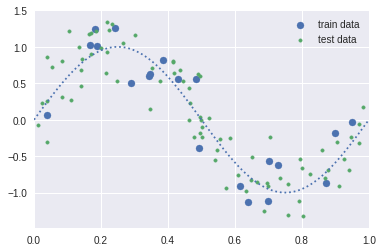

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

# 学習用データとテスト用データを分ける
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8)  # 学習データ20％、テストデータ80％

# 元のsinとサンプルデータをplot
plt.plot(x_orig,f(x_orig),ls=':')
plt.scatter(x_train,y_train            ,label='train data')
plt.scatter(x_test ,y_test  ,marker='.',label='test data')
plt.xlim((0,1))
plt.legend(loc='upper right')

## （３）データの学習とモデルのグラフ表示

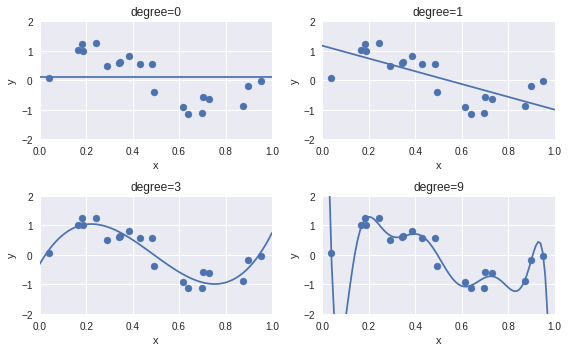

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 2×2のグラフを描く準備をする
fig,axs = plt.subplots(2,2,figsize=(8,5))

# 次数0,1,3,9について学習した結果を表示
for ax,deg in zip(axs.ravel(),[0,1,3,9]):
  # パイプラインを作る
  e = make_pipeline(PolynomialFeatures(deg),LinearRegression())
  # 学習セットで学習する
  e.fit(x_train,y_train)
  
  # 元のxを与えて予測
  px = e.predict(x_orig[:,np.newaxis])
 
  # 予測結果のグラフと学習データの点を描画
  ax.scatter(x_train,y_train)
  # ax.scatter(x_test ,y_test  ,marker='.')
  ax.plot(x_orig,px)
  ax.set(xlim=(0,1),ylim=(-2,2),
        ylabel='y',xlabel='x',
        title='degree={}'.format(deg))
  
plt.tight_layout()

## （４）予測値との誤差を評価する

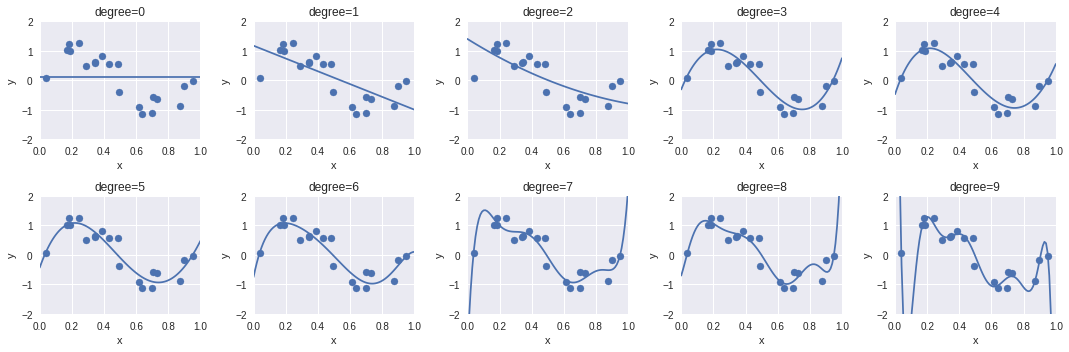

In [36]:
from sklearn.metrics import mean_squared_error

# 実データとの誤差を保存するarray
train_error = np.empty(10)
test_error  = np.empty(10)

# 5×5のグラフを描く準備をする
fig,axs = plt.subplots(2,5,figsize=(15,5))

# 次数0から9について調べる
for ax,deg in zip(axs.ravel(),[0,1,2,3,4,5,6,7,8,9]):
  # モデルをつくる
  e = make_pipeline(PolynomialFeatures(deg),LinearRegression())
  e.fit(x_train,y_train)
  
  # 元のxを与えて予測
  px = e.predict(x_orig[:,np.newaxis])
  
  # 予測結果のグラフと学習データの点を描画
  ax.scatter(x_train,y_train)
  # ax.scatter(x_test ,y_test  ,marker='.')
  ax.plot(x_orig,px)
  ax.set(xlim=(0,1),ylim=(-2,2),
         ylabel='y',xlabel='x',
         title='degree={}'.format(deg))
  # テストデータを使って、予測値と実際の値の誤差を調べる
  train_error[deg] = mean_squared_error(y_train,e.predict(x_train))
  test_error[deg]  = mean_squared_error(y_test ,e.predict(x_test))
  
plt.tight_layout()

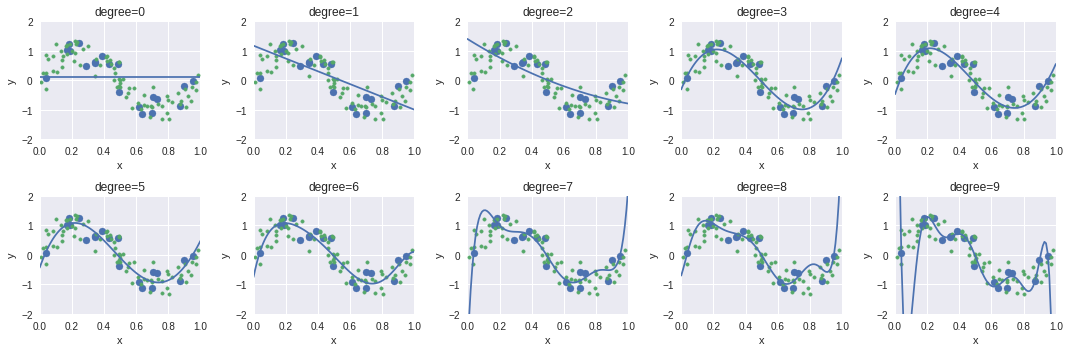

In [37]:
from sklearn.metrics import mean_squared_error

# 実データとの誤差を保存するarray
train_error = np.empty(10)
test_error  = np.empty(10)

# 5×5のグラフを描く準備をする
fig,axs = plt.subplots(2,5,figsize=(15,5))

# 次数0から9について調べる
for ax,deg in zip(axs.ravel(),[0,1,2,3,4,5,6,7,8,9]):
  # モデルをつくる
  e = make_pipeline(PolynomialFeatures(deg),LinearRegression())
  e.fit(x_train,y_train)
  
  # 元のxを与えて予測
  px = e.predict(x_orig[:,np.newaxis])
  
  # 予測結果のグラフと学習データの点を描画
  ax.scatter(x_train,y_train)
  ax.scatter(x_test ,y_test  ,marker='.')
  ax.plot(x_orig,px)
  ax.set(xlim=(0,1),ylim=(-2,2),
         ylabel='y',xlabel='x',
         title='degree={}'.format(deg))
  # テストデータを使って、予測値と実際の値の誤差を調べる
  train_error[deg] = mean_squared_error(y_train,e.predict(x_train))
  test_error[deg]  = mean_squared_error(y_test ,e.predict(x_test))
  
plt.tight_layout()

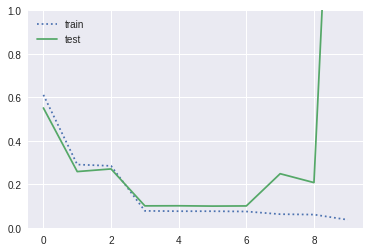

In [38]:
# 誤差のグラフを描く
plt.plot(np.arange(10),train_error,ls=':' ,label='train')
plt.plot(np.arange(10),test_error ,ls='-' ,label='test')
plt.ylim((0,1))
plt.legend(loc='upper left')